In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 

datos = pd.read_csv("AIRBNB.csv")
datos.head(3)


/tmp/ipykernel_18277/255756683.py:7: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("AIRBNB.csv")


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,11/04/2021,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13


# ¿Que tipo de columnas tiene nuestro dataset?

In [2]:
datos.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [3]:
dx  =  datos.review_scores_rating.dropna().to_frame()
dx.reset_index()
dx.dtypes

review_scores_rating    float64
dtype: object

El conjunto de datos evidencia que tenemos diferente tipos de datos, entre ellos observamos enteros, objetos y floats, esto es importante, pero también vemos que el conjunto datos es realmente ancho, aportando 74 columnas, por lo cual es importante reconocer la necesidad de trabajar toda la información. 

# ¿Cómo se distribuyen los precios en el conjunto de datos y cuáles son los valores más comunes de calificaciones?

In [4]:
n = dx.shape[0] # devuelve la cantidad de registros y columnas

k = 1 + (10/3) *np.log10(n) # esto es la formula de sturges
k = int(k.round(0))
k
# esto es par acalcular los bins de la manera adecuada

15

In [5]:
# vamos a calcular los bins por lista por facilidad
bins = [20,26,32,38,44,50,56,62,68,74,80,86,92,98,104]

frecuencia= pd.value_counts(
   pd.cut(
      x = dx.review_scores_rating,
      bins = bins,
      include_lowest = True
    ),
   sort = False
)
frecuencia

(19.999, 26.0]      24
(26.0, 32.0]         1
(32.0, 38.0]         0
(38.0, 44.0]        22
(44.0, 50.0]         9
(50.0, 56.0]         3
(56.0, 62.0]        94
(62.0, 68.0]        31
(68.0, 74.0]        80
(74.0, 80.0]       449
(80.0, 86.0]       443
(86.0, 92.0]      2037
(92.0, 98.0]      6481
(98.0, 104.0]     5513
Name: review_scores_rating, dtype: int64

In [6]:
porcentual = pd.value_counts(
   pd.cut(
      x = dx.review_scores_rating,
      bins = bins,
      include_lowest = True
    ),
   sort = False,
   normalize = True
    
) * 100 
porcentual

(19.999, 26.0]     0.158030
(26.0, 32.0]       0.006585
(32.0, 38.0]       0.000000
(38.0, 44.0]       0.144861
(44.0, 50.0]       0.059261
(50.0, 56.0]       0.019754
(56.0, 62.0]       0.618950
(62.0, 68.0]       0.204122
(68.0, 74.0]       0.526766
(74.0, 80.0]       2.956476
(80.0, 86.0]       2.916968
(86.0, 92.0]      13.412787
(92.0, 98.0]      42.674656
(98.0, 104.0]     36.300784
Name: review_scores_rating, dtype: float64

In [7]:
acumulada = frecuencia.cumsum()
acumulada

acumulada_porcentual = porcentual.cumsum()
acumulada_porcentual

(19.999, 26.0]      0.158030
(26.0, 32.0]        0.164614
(32.0, 38.0]        0.164614
(38.0, 44.0]        0.309475
(44.0, 50.0]        0.368736
(50.0, 56.0]        0.388490
(56.0, 62.0]        1.007441
(62.0, 68.0]        1.211563
(68.0, 74.0]        1.738329
(74.0, 80.0]        4.694805
(80.0, 86.0]        7.611773
(86.0, 92.0]       21.024560
(92.0, 98.0]       63.699216
(98.0, 104.0]     100.000000
Name: review_scores_rating, dtype: float64

In [8]:
tabla_r = pd.DataFrame({"Frecuencia":frecuencia, "Relativa":porcentual, "Acumulada":acumulada,"Acumulada_%":acumulada_porcentual})
tabla_r

,Frecuencia,Relativa,Acumulada,Acumulada_%
"(19.999, 26.0]",24,0.158030,24,0.158030
"(26.0, 32.0]",1,0.006585,25,0.164614
"(32.0, 38.0]",0,0.000000,25,0.164614
"(38.0, 44.0]",22,0.144861,47,0.309475
"(44.0, 50.0]",9,0.059261,56,0.368736
"(50.0, 56.0]",3,0.019754,59,0.388490
"(56.0, 62.0]",94,0.618950,153,1.007441
"(62.0, 68.0]",31,0.204122,184,1.211563
"(68.0, 74.0]",80,0.526766,264,1.738329
"(74.0, 80.0]",449,2.956476,713,4.694805


Podemos observar como se distribuyen los datos de las calificaciones, podemos ver que existe un gran rango de calificaciones que se concentra entre el intervalo 92.0 al 98.0, esto mostrando que su frecuencia es de 6481, indicando que es el valor que más se repite dentro de los bins, en este sentido vemos que esto representa al 63.69% del conjunto total de los datos, bajo este supuesto podemos concluir que la mayoría de las calificaciones estan concentradas en la parte superior, lo que indica un alto compromiso por cada entidad que se vincula a AIRBNB para ofrecer un buen servicio. 

In [9]:
df = datos.price.dropna()
a = df.quantile(0.78)

quantil_78 = datos.loc[(datos.price >= 195), "price"]
quantil_78.mean()

297.911905361188

In [10]:
datos.price.quantile(0.5)

129.0

In [11]:
mean = datos.price.dropna().mean()

std = datos.price.std()
std

154.16256588595425

In [12]:
suma = mean + 100
suma

254.4958765778401

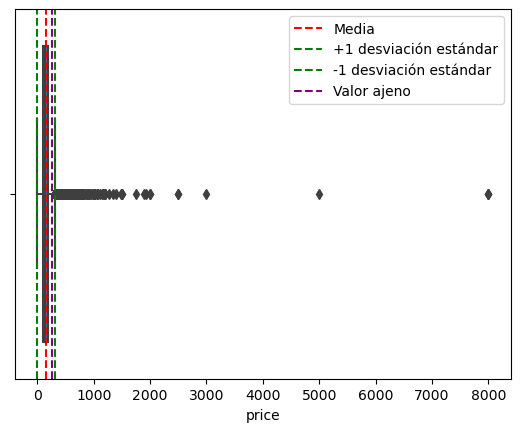

In [13]:
df = datos.price.dropna()
# Dibuja el boxplot
sns.boxplot( x=df)


# Dibuja las líneas para la media y la desviación estándar
plt.axvline(mean, color='r', linestyle='--', label='Media')
plt.axvline(mean+std, color='g', linestyle='--', label='+1 desviación estándar')
plt.axvline(mean-std, color='g', linestyle='--', label='-1 desviación estándar')

# Agrega una línea vertical para un valor ajeno
plt.axvline(suma, color='purple', linestyle='--', label='Valor ajeno')

# Añade leyendas
plt.legend()

# Muestra el plot
plt.show()


In [14]:
n = datos.shape[0] # devuelve la cantidad de registros y columnas

k = 1 + (10/3) * np.log10(n) # esto es la formula de sturges
k = int(k.round(0))
k
k1 = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
# esto es par acalcular los bins de la manera adecuada


# Crear la tabla de frecuencia
frecuencia = pd.value_counts(pd.cut(datos.price, bins=k, include_lowest=True), sort=False)

# Crear la tabla de frecuencia relativa
relativa = frecuencia / len(datos)

# Crear la tabla de frecuencia acumulada
acumulada = frecuencia.cumsum()

# Crear la tabla de frecuencia acumulada porcentual
acumulada_porcentual = acumulada / len(datos) * 100

# Crear un DataFrame con todas las tablas
tabla = pd.DataFrame({"Frecuencia": frecuencia, "Relativa": relativa, "Acumulada": acumulada, "Acumulada_%": acumulada_porcentual})
tabla

,Frecuencia,Relativa,Acumulada,Acumulada_%
"(-8.001, 533.333]",17648,0.990070,17648,99.007013
"(533.333, 1066.667]",151,0.008471,17799,99.854137
"(1066.667, 1600.0]",14,0.000785,17813,99.932679
"(1600.0, 2133.333]",5,0.000281,17818,99.960729
"(2133.333, 2666.667]",2,0.000112,17820,99.971950
"(2666.667, 3200.0]",1,0.000056,17821,99.977560
"(3200.0, 3733.333]",0,0.000000,17821,99.977560
"(3733.333, 4266.667]",0,0.000000,17821,99.977560
"(4266.667, 4800.0]",0,0.000000,17821,99.977560
"(4800.0, 5333.333]",1,0.000056,17822,99.983170


In [15]:

# Obtener los cuantiles
quantiles = np.linspace(0, 1, num=101)  # 100 partes, incluyendo el mínimo y el máximo
valores_cuantiles = datos["price"].quantile(quantiles)

# Crear la tabla de quantiles
tabla_quantiles = pd.DataFrame({"Cuantil": quantiles, "Valor": valores_cuantiles})
tabla_quantiles

,Cuantil,Valor
0.00,0.00,0.00
0.01,0.01,31.00
0.02,0.02,40.00
0.03,0.03,47.00
0.04,0.04,50.00
...,...,...
0.96,0.96,350.00
0.97,0.97,392.12
0.98,0.98,447.52
0.99,0.99,524.76


In [16]:
datos["price"].quantile([0.25,0.5,0.75])
#180 - 95

0.25     95.0
0.50    129.0
0.75    180.0
Name: price, dtype: float64

Lo que podemos observar es que en la columna precio la tabla de frecuencias nos dificulta hacer un ejercicio descriptivo de manera sencilla, esto con ocasión a que se incluyen valores negativos dentro de los bins utilizando la formula de sturges, por tal motivo, se realiza una tabla de cuantiles de 0 a 100 que nos permite afirmar que existe gran variabilidad en los datos, no obstante la mayoría de los mismos son menores a 500, pudiendo ser 500 euores siendo en EUROPA, igualmente, vemos que el rango intercuantilico se establece en 85. Esto nos permite observar que el 50% de nuestros datos esta entre 95 y 180, cabe señalar que esta medida de variabilidad solo nos habla del rango intercuantilico y no de todo el conjunto de datos, por lo cual es dable afirmar que existen diferenets datos atipicos lo que genera una distribución sesgada hacia la derecha.  

<AxesSubplot:xlabel='room_type', ylabel='price'>

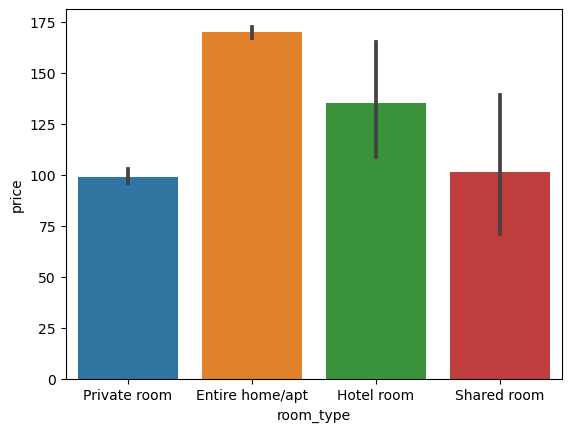

In [17]:
sns.barplot(y=datos.price.dropna(), x=datos.room_type.dropna())

Ahora, podemos ver que se presentan el tipo de habitación y su precio, observando que en la tipologia Casas y Apartamentos existe una mejor valoración respecto a este tipo y el precio que se paga, asi sucesivamente le siguen los hoteles, habitaciones compartidas y cuartos privados.

<AxesSubplot:xlabel='reviews_per_month', ylabel='room_type'>

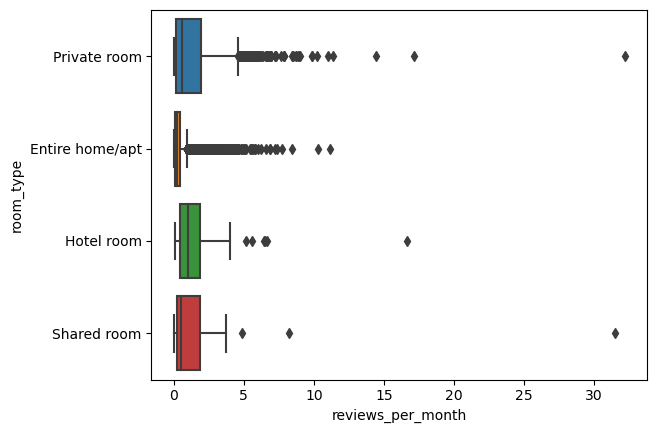

In [18]:
sns.boxplot(x=datos.reviews_per_month.dropna(), y=datos.room_type.dropna())

# ¿Existe algún tipo de asociación entre las calificaciones por mes y el precio?

In [19]:
df = datos[["price","reviews_per_month","room_type"]].dropna()

import scipy.stats as stats

corr, pvalue = stats.pearsonr(df.price, df.reviews_per_month)
(corr, pvalue)

df[["price","reviews_per_month"]].corr(method="pearson")


,price,reviews_per_month
price,1.000000,-0.091638
reviews_per_month,-0.091638,1.000000


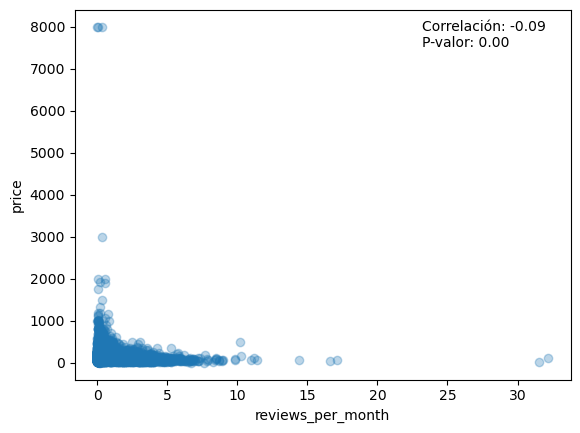

'print("Correlación: {:.2f}".format(corr))\nprint("Valor p: {:.2f}".format(pval))'

In [20]:

# Trazar gráfico de dispersión sin línea de ajuste y puntos semitransparentes
sns.regplot(y="price", x="reviews_per_month", data=df, fit_reg=False, scatter_kws={"alpha":0.3})

# Calcular correlación y valor p
corr, pval = stats.pearsonr(df["price"], df["reviews_per_month"])
plt.annotate("Correlación: {:.2f}\nP-valor: {:.2f}".format(corr, pval), xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()
"""print("Correlación: {:.2f}".format(corr))
print("Valor p: {:.2f}".format(pval))"""

Podemos observar que en realidad existe una relación negativa mínima entre la variable precio y reviews por mes, esto nos indica que las calificaciones por mes no estan asociadas al valor de las habitación. 

In [21]:
# Calcular correlación y valor p de spearman

x = df["room_type"].dropna()
x_2 = df["reviews_per_month"].dropna()
corr_spearman, pval_spearman = stats.spearmanr(x, x_2)

print("Correlación de Spearman: {:.2f}".format(corr_spearman))
print("Valor p de Spearman: {:.2f}".format(pval_spearman))

Correlación de Spearman: 0.27
Valor p de Spearman: 0.00


/home/oscar/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Esto nos indica que existe una correlación de spearman moderada, que nos indica que existe asociación entre las calificaciones por mes y el tipo de habitación a alquilar. 


# ¿Existe algún tipo de asociación entre la variable reviews_scores_rating y reviews_scores_comunications? Describa lo sucedido

In [22]:
# Vamos a generar un sub dataframe de estos datos, primero miramos que tipo de columnas son

print(datos.review_scores_rating.dtype, datos.review_scores_communication.dtype)

float64 float64


In [23]:
# los dos datos son floats por lo que les es aplicable la correlación de pearson, vamos a eliminar
# los datos nan y los 0 debido a que eso pide el ejercicio

df = datos.loc[(datos.review_scores_rating != 0) &  (datos.review_scores_communication != 0), ["review_scores_rating","review_scores_communication"]]
df = df.dropna()
df.head(3)

,review_scores_rating,review_scores_communication
0,98.0,10.0
1,89.0,10.0
2,100.0,10.0


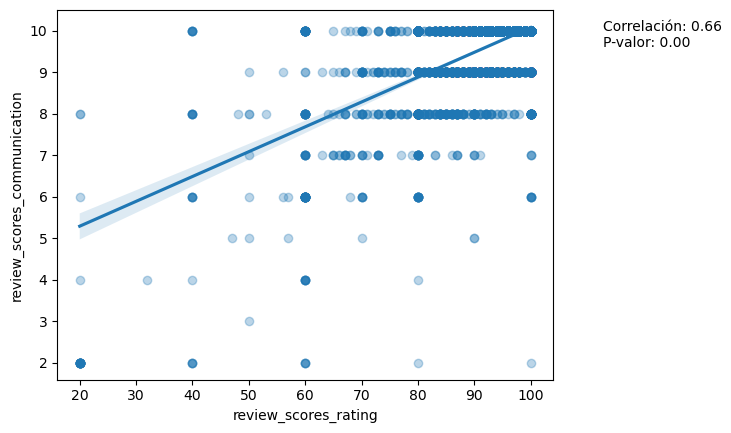

'print("Correlación: {:.2f}".format(corr))\nprint("Valor p: {:.2f}".format(pval))'

In [24]:
# Trazar gráfico de dispersión con línea de ajuste y puntos semitransparentes
sns.regplot(y="review_scores_communication", x="review_scores_rating", data=df, fit_reg=True, scatter_kws={"alpha":0.3})

# Calcular correlación y valor p
corr, pval = stats.pearsonr(df.review_scores_communication, df.review_scores_rating)
plt.annotate("Correlación: {:.2f}\nP-valor: {:.2f}".format(corr, pval), xy=(1.1, 0.9), xycoords='axes fraction')
plt.show()
"""print("Correlación: {:.2f}".format(corr))
print("Valor p: {:.2f}".format(pval))"""

Se puede observar una asociación moderada positiva entre las variables, lo que indica que a medida que se tiene una mejor calificación en comunicación, esto se refleja en un incremento de la ponderación de la calificación, cabe decir que esta asociación no es casualidad.

# ¿Existe asociación entre la variable Camas y Price? Elimine datos NaNs y valores 0

In [25]:
dx = datos.loc[(datos.bedrooms != 0) &  (datos.price < 400), ["bedrooms","price"]]
dx = dx.dropna()
dx.head(3)

,bedrooms,price
0,1.0,59
1,1.0,200
2,1.0,125


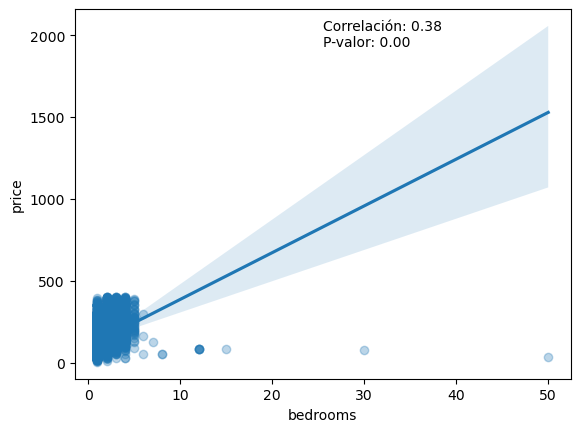

In [26]:
# Trazar gráfico de dispersión con línea de ajuste y puntos semitransparentes
sns.regplot(y="price", x="bedrooms", data=dx, fit_reg=True, scatter_kws={"alpha":0.3})

# Calcular correlación y valor p
corr, pval = stats.pearsonr(dx.price, dx.bedrooms)
plt.annotate("Correlación: {:.2f}\nP-valor: {:.2f}".format(corr, pval), xy=(0.5, 0.9), xycoords='axes fraction')
plt.show()

In [27]:
dx.corr(method="spearman")

,bedrooms,price
bedrooms,1.000000,0.468156
price,0.468156,1.000000


Podemos observar que existe una correlación de .38 de Pearson y de .47 de Spearman entre la variable precio y dormitorios dentro del conjunto de datos de AIRBNB, esta asociación baja positiva, lo que indica que a medida de que haya más dormitorios el precio tiende a incrementar o también podría indicarse que entre mayor es el precio mayor numero de habitaciones o dormitorios hay. No obstante, dentro del ejercicio se eliminaron los 0 dentro de la variable dormitorios y se filtraron los precios menos a 400, esto quiere decir que de cierta medida hemos reducido la variabilidad de la asociación y esto podría llevarnos a dar inferencias irrazonables o confusas que no esten alineadas a la realidad. Es importante reconocer que otras variables pueden estar teniendo influencia en esta asociación, por ejemplo la ubicación, las calificaciones del huesped, las temporadas, entre otras. 

En resumen los datos de la correlación de Spearman son más apropiados para el problema en cuestión porque tenemos datos continuos y discretos dentro las variables cuantitativas, por lo que de antemano podríamos considerar que no hay una relación lineal. 

 # 1.	Si se alquila un inmueble con puntaje de revisión entre 80 y 89 puntos el 80% de las publicaciones pueden ser habitación privada, casas o apartamento.


In [28]:
dx = datos.loc[(datos.review_scores_rating >= 80) & (datos.review_scores_rating < 90),"room_type"].dropna()
dx.value_counts(normalize=True)

Entire home/apt    0.711525
Private room       0.271912
Hotel room         0.011732
Shared room        0.004831
Name: room_type, dtype: float64

Si, teniendo en cuenta que el 80% hace parte de más de una categoria podríamos afirmar que esto es correcto, en tanto casas o apartamentos, sumado las habitaciones privadas nos muestran que suman cerca de un 90%.

# 2.	Si se alquila una casa o apartamento el 30% de las publicaciones tendrán un puntaje de revisión entre el 80 y 100 puntos.

In [29]:
dx = datos.loc[(datos.review_scores_rating >= 80) & (datos.review_scores_rating < 90) ,["room_type","review_scores_rating"]].dropna()
a = dx.groupby(["review_scores_rating"]).agg({"room_type": lambda x: np.mean(x=="Entire home/apt")})
a.sum()/dx.shape[0]

room_type    0.004685
dtype: float64

Podemos indicar que la afirmación anterior es incorrecta, pues solo el 15% de la categoría de alojamiento casa o apartamento tiene una ponderación entre 80 y 100 puntos. 

# 3.	El 30% de las publicaciones son habitaciones privadas que poseen entre 90 y 100 puntos de revisión. 

In [30]:
dx = datos.loc[(datos.review_scores_rating > 89),["room_type","review_scores_rating"]].dropna()
a = dx.groupby(["review_scores_rating"]).agg({"room_type": [lambda x: np.mean(x=="Private room"),
                                                            lambda x: np.sum(x=="Private room")/dx.shape[0]]})
a.columns = ["porcentaje","total"]
a.total.sum()


0.19637934887879016

Podemos observar que la afirmación anterior es incorrecta, pues un el margen es de 19.6% porciento de la categoria habitaciones privadas se encuentra entre el 90 y 100 de calificación. Esta calificación la hallamos  

In [31]:
# creando una tabla de contingencia
a = pd.crosstab(dx.room_type, dx.review_scores_rating, margins = True, normalize="columns")
a

review_scores_rating,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,All
room_type,,,,,,,,,,,,
Entire home/apt,0.738462,0.712042,0.763224,0.781659,0.751623,0.771967,0.779690,0.751962,0.791908,0.756176,0.850502,0.794904
Hotel room,0.007692,0.013089,0.017632,0.004367,0.006494,0.007322,0.011188,0.007064,0.007065,0.005371,0.002182,0.005960
Private room,0.249231,0.267016,0.211587,0.208515,0.238636,0.217573,0.205680,0.239403,0.200385,0.238453,0.144915,0.196379
Shared room,0.004615,0.007853,0.007557,0.005459,0.003247,0.003138,0.003442,0.001570,0.000642,0.000000,0.002401,0.002756


In [32]:
tabla_contingencia = pd.crosstab(dx.room_type, dx.review_scores_rating, margins = True)
tabla_contingencia

review_scores_rating,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,All
room_type,,,,,,,,,,,,
Entire home/apt,480,272,303,716,463,738,906,958,1233,704,3897,10670
Hotel room,5,5,7,4,4,7,13,9,11,5,10,80
Private room,162,102,84,191,147,208,239,305,312,222,664,2636
Shared room,3,3,3,5,2,3,4,2,1,0,11,37
All,650,382,397,916,616,956,1162,1274,1557,931,4582,13423


# CHI AL CUADRADO

Esta es una prueba de hipotesis para lo que se calcula la prueba de hipotesis chi y a partir de ahi se genera el pvalue para determinar que hacer con la hipotesis nula establecida. 

In [33]:
chi, pvalue, dof, exp = stats.chi2_contingency(tabla_contingencia) 
pvalue

6.863859688450569e-20

In [34]:
# valor critico 

stats_chi = stats.chi.ppf(0.95, dof)
stats_chi

7.776945838974092

In [35]:
chi > stats_chi

True

En este elemento podríamos indicar que el pvalue es muy muy pequeño y podríamos rechazar la hipotesis nula, pero en este caso no establecimos hipotesis nula. 

In [36]:
dx = datos[["room_type","review_scores_rating"]]
dx["intervalo"] = pd.cut(x=dx.review_scores_rating, bins=[20,30,40,50,60,70,80,90,100])
tabla_contingencia = pd.crosstab(dx.room_type, dx.intervalo, margins = True, normalize="all")
tabla_contingencia

/tmp/ipykernel_18277/1727476613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["intervalo"] = pd.cut(x=dx.review_scores_rating, bins=[20,30,40,50,60,70,80,90,100])


intervalo,"(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]",All
room_type,,,,,,,,
Entire home/apt,0.000857,0.000396,0.004682,0.003693,0.024006,0.079997,0.672031,0.785662
Hotel room,0.000000,0.000000,0.000000,0.000000,0.000198,0.001253,0.004946,0.006397
Private room,0.000660,0.000198,0.001715,0.001187,0.007782,0.030337,0.163160,0.205039
Shared room,0.000000,0.000000,0.000000,0.000000,0.000066,0.000594,0.002242,0.002902
All,0.001517,0.000594,0.006397,0.004880,0.032052,0.112181,0.842379,1.000000


In [ ]:
chi, pvalue, dof, exp = stats.chi2_contingency(tabla_contingencia) 
pvalue

In [ ]:
stats_chi = stats.chi.ppf(0.95, dof)
stats_chi

En esta actividad, tomaremos los datos de Airbnb para validar la hipótesis de que los valores de precios en apartamento de dos alcobas para el centro de Amsterdam son iguales o no.  

In [53]:
# primero que todo vamos a revisar nuestras variables y generar un data set
#h0 m1 = m2
#ha m1 != m2
# para este caso vamos a estimar la media de precios de las habitaciones y apartamentos
h0 = datos.loc[(datos.room_type == "Entire home/apt"), "price"].dropna().mean()



169.86168681635002

Nuestra hipotesis nula es que como no tenemos medias para comparar, hemos asignado un valor de precios para la categoria de apartamentos de todos los lugares y vamos a indicar que son iguales a los precios en apartamento de dos alcobas para el centro de Amsterdam.

In [74]:
dx = datos.loc[(datos.room_type == "Entire home/apt") & (datos.bedrooms <= 2),["price","room_type","neighbourhood_cleansed"]].dropna()
centro = dx[dx['neighbourhood_cleansed'].str.contains('Centrum')]
centro.head(5)

,price,room_type,neighbourhood_cleansed
2,125,Entire home/apt,Centrum-West
6,160,Entire home/apt,Centrum-West
7,211,Entire home/apt,Centrum-West
10,157,Entire home/apt,Centrum-West
34,249,Entire home/apt,Centrum-West


In [82]:
m1 = centro.price.mean()
std = centro.price.std()
n = centro.price.size

# error estandar media poblacional e = std/np.sqrt(n)
e = std/np.sqrt(n)

# stats z = m1 - h0 / error estandar

stats_z = (m1 - h0 )/ e
stats_z

# pvalue = 2 * norm.cdf(-abs(stats_z))
pvalue = 2 * stats.norm.cdf(-abs(stats_z))
print("z stats",stats_z)
print("pvalue",pvalue)

z stats 5.608140432731204
pvalue 2.0451205722951612e-08


In [81]:
from statsmodels.stats.weightstats import ztest

ztest(centro.price, value = h0)

# Verificando resultados


(5.608140432731202, 2.045120572295191e-08)

Podemos indicar que hay una alta significancia estadística para rechazar la hipotesis nula, e indicar que existe diferencia entre la media de precios entre apartamentos con dos habitaciones o menos que se ubican en el centro de Amsterdam frente a los precios de los apartamentos con todo tipo de habitaciones. Esto puede llegarnos hacer pensar que los apartamentos pueden variar su precio según el número de habitaciones y ubicación. 

In [84]:
# intervalo de confianza para la media poblacional de apartamentos con más de dos habitaciones en el centro

z = stats.norm.ppf(0.5+(0.95/2)) 

e  # el error estandar definido en la parte de arriba

m1 # media muestral definida en la parte superior

intervalos = (

    m1 - (z * e),
    m1 + (z * e)

)
intervalos

(186.96721088548523, 205.34692008448033)

In [91]:
stats.norm.interval(confidence = 0.95, loc=m1, scale=e)

(186.96721088548523, 205.34692008448033)

Verificada la información anterior podemos indicar que la media poblacional del precio de alojamiento en  los apartamentos que tienen dos habitaciones o menos y que se encuentran en el centro de Amsterdam, esta entre 186.96 y 205.34, esto también nos corrobora que el dato de la hipotesis nula no se encuentra dentro del intervalo de confianza.

In [92]:
h0

169.86168681635002

In [99]:
datos['calendar_last_scraped'] = pd.to_datetime(datos['calendar_last_scraped'], format='%d/%m/%Y')

# ANOVA

La estadística ANOVA es como un juego de adivinanza donde tenemos que descubrir si hay alguna diferencia entre varios grupos. Por ejemplo, imagina que tienes tres equipos de fútbol: el equipo A, el equipo B y el equipo C. Quieres saber si hay alguna diferencia en la cantidad de goles que marcan cada uno de estos equipos. Para descubrirlo, podrías usar ANOVA.

En ANOVA, lo que hacemos es calcular la varianza (una medida de la variabilidad) dentro de cada equipo y entre los equipos. Si la varianza entre los equipos es mucho más grande que la varianza dentro de los equipos, significa que hay una diferencia real en la cantidad de goles que marcan. Si la varianza entre los equipos es similar a la varianza dentro de los equipos, significa que no hay una diferencia real en la cantidad de goles que marcan.

En resumen, ANOVA es una herramienta estadística que nos ayuda a determinar si hay diferencias significativas entre varios grupos.

En ANOVA, el p-valor es una medida que indica la probabilidad de obtener los resultados observados si la hipótesis nula es verdadera. Si el p-valor es menor que un nivel de significancia previamente establecido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que al menos un grupo difiere significativamente de los otros.

En ANOVA, se utiliza la estadística F en lugar de la estadística t de la prueba t. La estadística F se calcula al dividir la varianza entre grupos (variabilidad entre los grupos) por la varianza dentro de grupos (variabilidad dentro de cada grupo). Si el valor de la estadística F es grande y el p-valor es menor que el nivel de significancia previamente establecido, se concluye que hay diferencias significativas entre los grupos. En cambio, si el valor de la estadística F es pequeño y el p-valor es grande, no se puede rechazar la hipótesis nula y se concluye que no hay diferencias significativas entre los grupos.